In [1]:
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load DC Census Block Group shapefile
data_path = '/Users/wooyongjung/WJ_Projects/HomelessStudy_SanFrancisco_2024/data/tl_2021_11_bg/tl_2021_11_bg.shp'
census_bg = gpd.read_file(data_path)
census_bg = census_bg.to_crs(epsg=7132)
census_bg = census_bg[census_bg['GEOID'].str.startswith('11001')]
census_bg = census_bg[['GEOID', 'geometry']]


In [3]:
census_bg.reset_index(drop=True, inplace=True)
census_bg.head()

,GEOID,geometry
0,110010007022,"POLYGON ((13226501.667 4188642.758, 13226485.0..."
1,110010006003,"POLYGON ((13226310.746 4191737.999, 13226197.6..."
2,110010006004,"POLYGON ((13222765.409 4194845.105, 13222909.0..."
3,110010011001,"POLYGON ((13216644.692 4200936.019, 13216512.2..."
4,110010004002,"POLYGON ((13228431.501 4188249.605, 13228494.0..."


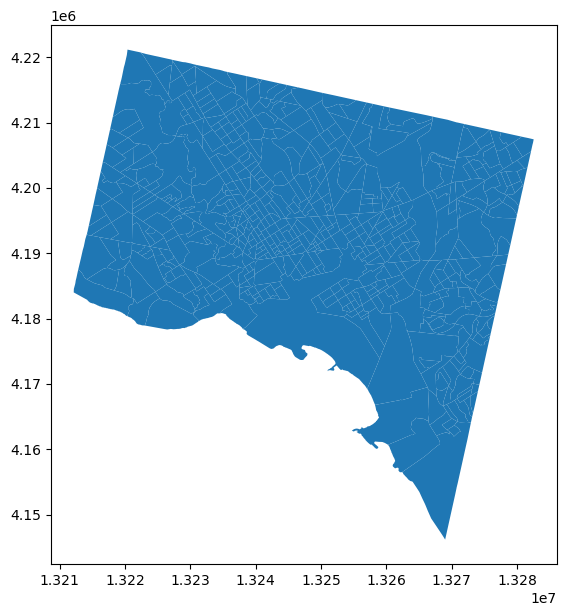

In [5]:
census_bg.plot(figsize=(7, 7))
plt.show()

In [7]:
# Load bbox dataset
df_bbox = pd.read_csv('data/DC_bbox/df_bbox_99.csv')

In [8]:
df_bbox.head()

,Unnamed: 0,row_num,col_num,swne_edges,center_latlon,center_lat,center_lon,GEOID
0,0,0,0,"(38.79004401168929, -77.12214000035773, 38.791...","(38.79078547660671, -77.12123558302413)",38.790785,-77.121236,510594203001
1,1,0,1,"(38.7900776409016, -77.12028819502156, 38.7915...","(38.790819092024, -77.11938375742014)",38.790819,-77.119384,510594203001
2,2,0,2,"(38.79011124079366, -77.11843638659438, 38.791...","(38.79085267812021, -77.11753192872636)",38.790853,-77.117532,510594203001
3,3,0,3,"(38.79014481136531, -77.11658457507889, 38.791...","(38.790886234895176, -77.11568009694551)",38.790886,-77.115680,510594203001
4,4,0,4,"(38.7901783526164, -77.11473276047779, 38.7916...","(38.790919762348764, -77.11382826208028)",38.790920,-77.113828,510594203001


In [9]:
# Select the rows with GEOID starting with 06075 (San Francisci County)
df_bbox['GEOID'] = df_bbox['GEOID'].astype(str)

# Add 0 to the beginning of GEOID
#df_bbox['GEOID'] = df_bbox['GEOID'].apply(lambda x: x.zfill(12))
df_bbox = df_bbox[df_bbox['GEOID'].str.startswith('11001')]

# Reset index
df_bbox.reset_index(inplace=True, drop=True)

# Drop the first column Unnamed: 0
df_bbox = df_bbox.drop(['Unnamed: 0'], axis=1)

In [10]:
df_bbox.head()

,row_num,col_num,swne_edges,center_latlon,center_lat,center_lon,GEOID
0,1,45,"(38.79297766582736, -77.03884704247784, 38.794...","(38.79371850978283, -77.03794169706438)",38.793719,-77.037942,110010109002
1,2,45,"(38.79442703415638, -77.03888834960206, 38.795...","(38.79516787874482, -77.03798298694552)",38.795168,-77.037983,110010109002
2,2,46,"(38.79445934713823, -77.037036332922, 38.79594...","(38.795200177892994, -77.03613095004992)",38.795200,-77.036131,110010109002
3,3,45,"(38.79587640208779, -77.03892965969936, 38.797...","(38.79661724730925, -77.0380242797985)",38.796617,-77.038024,110010109002
4,3,46,"(38.79590871673287, -77.03707760555871, 38.797...","(38.79664954811994, -77.03617220544085)",38.796650,-77.036172,110010109002


In [11]:
df_bbox.shape

(6833, 7)

In [12]:
df_bbox['swne_edges'] = df_bbox['swne_edges'].apply(lambda x: x[1:-1].split(','))

In [13]:
df_bbox.head()

,row_num,col_num,swne_edges,center_latlon,center_lat,center_lon,GEOID
0,1,45,"[38.79297766582736, -77.03884704247784, 38.7...","(38.79371850978283, -77.03794169706438)",38.793719,-77.037942,110010109002
1,2,45,"[38.79442703415638, -77.03888834960206, 38.7...","(38.79516787874482, -77.03798298694552)",38.795168,-77.037983,110010109002
2,2,46,"[38.79445934713823, -77.037036332922, 38.795...","(38.795200177892994, -77.03613095004992)",38.795200,-77.036131,110010109002
3,3,45,"[38.79587640208779, -77.03892965969936, 38.7...","(38.79661724730925, -77.0380242797985)",38.796617,-77.038024,110010109002
4,3,46,"[38.79590871673287, -77.03707760555871, 38.7...","(38.79664954811994, -77.03617220544085)",38.796650,-77.036172,110010109002


In [14]:
# Create coordinates
coords = []
for i in range(len(df_bbox)):
    coord = [(df_bbox['swne_edges'][i][1], df_bbox['swne_edges'][i][0]),
             (df_bbox['swne_edges'][i][3], df_bbox['swne_edges'][i][0]),
             (df_bbox['swne_edges'][i][3], df_bbox['swne_edges'][i][2]),
             (df_bbox['swne_edges'][i][1], df_bbox['swne_edges'][i][2])]
    coords.append(coord)

df_bbox['coords'] = coords

In [16]:
from shapely.geometry import Polygon, LineString, Point, MultiPolygon
# Apply Polygon to coords
df_bbox['geometry'] = df_bbox['coords'].apply(Polygon)

In [17]:
# Convert geometry to GeoDataFrame
df_bbox = gpd.GeoDataFrame(df_bbox, geometry=df_bbox['geometry'], crs=4326)

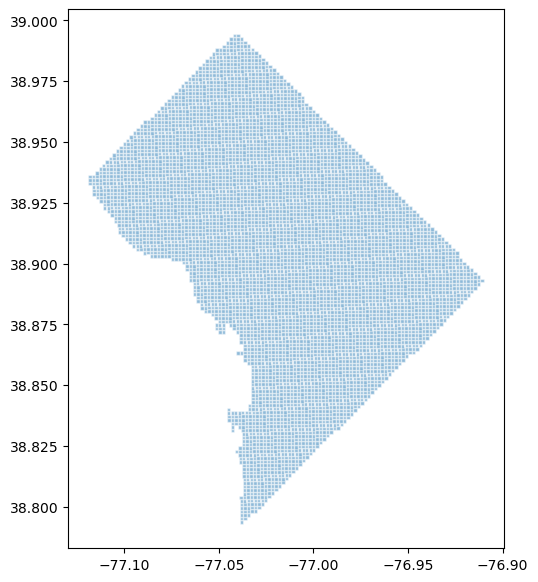

In [18]:
ax = df_bbox.plot(figsize=(7, 7), alpha=0.5, edgecolor='white')
plt.show()

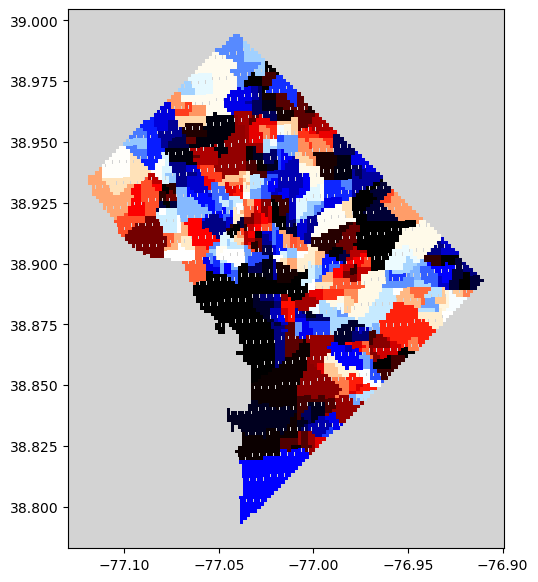

In [19]:
ax = df_bbox.plot(figsize=(7, 7), column='GEOID', cmap='flag')
ax.set_facecolor('lightgray')
plt.show()

In [20]:
df_bbox['GEOID'].nunique()

566

In [21]:
df_bbox.tail()

,row_num,col_num,swne_edges,center_latlon,center_lat,center_lon,GEOID,coords,geometry
6828,138,46,"[38.991569959503465, -77.04267677738174, 38....","(38.9923108765222, -77.04176903775502)",38.992311,-77.041769,110010016004,"[( -77.04267677738174, 38.991569959503465), ( ...","POLYGON ((-77.04268 38.99157, -77.04086 38.991..."
6829,138,47,"[38.99160246976094, -77.04081963825777, 38.9...","(38.992343372846896, -77.03991187821676)",38.992343,-77.039912,110010016004,"[( -77.04081963825777, 38.99160246976094), ( -...","POLYGON ((-77.04082 38.99160, -77.03900 38.991..."
6830,138,48,"[38.99163495048279, -77.03896249613426, 38.9...","(38.99237583963512, -77.0380547156802)",38.992376,-77.038055,110010016004,"[( -77.03896249613426, 38.99163495048279), ( -...","POLYGON ((-77.03896 38.99163, -77.03715 38.991..."
6831,139,46,"[38.993019274964375, -77.04271845616672, 38....","(38.993760192619476, -77.04181069912609)",38.993760,-77.041811,110010016004,"[( -77.04271845616672, 38.993019274964375), ( ...","POLYGON ((-77.04272 38.99302, -77.04090 38.993..."
6832,139,47,"[38.99305178689266, -77.04086127921381, 38.9...","(38.99379269061424, -77.03995350175742)",38.993793,-77.039954,110010016004,"[( -77.04086127921381, 38.99305178689266), ( -...","POLYGON ((-77.04086 38.99305, -77.03905 38.993..."


In [22]:
census_bg.head()

,GEOID,geometry
0,110010007022,"POLYGON ((13226501.667 4188642.758, 13226485.0..."
1,110010006003,"POLYGON ((13226310.746 4191737.999, 13226197.6..."
2,110010006004,"POLYGON ((13222765.409 4194845.105, 13222909.0..."
3,110010011001,"POLYGON ((13216644.692 4200936.019, 13216512.2..."
4,110010004002,"POLYGON ((13228431.501 4188249.605, 13228494.0..."


In [23]:
census_bg.shape

(571, 2)

In [24]:
df_bbox['GEOID'].nunique()

566

In [25]:
df_bbox.shape

(6833, 9)

In [26]:
# Save df_bbox
df_bbox.to_csv('data/df_bbox_dc.csv')

In [27]:
df_bbox

,row_num,col_num,swne_edges,center_latlon,center_lat,center_lon,GEOID,coords,geometry
0,1,45,"[38.79297766582736, -77.03884704247784, 38.7...","(38.79371850978283, -77.03794169706438)",38.793719,-77.037942,110010109002,"[( -77.03884704247784, 38.79297766582736), ( -...","POLYGON ((-77.03885 38.79298, -77.03704 38.792..."
1,2,45,"[38.79442703415638, -77.03888834960206, 38.7...","(38.79516787874482, -77.03798298694552)",38.795168,-77.037983,110010109002,"[( -77.03888834960206, 38.79442703415638), ( -...","POLYGON ((-77.03889 38.79443, -77.03708 38.794..."
2,2,46,"[38.79445934713823, -77.037036332922, 38.795...","(38.795200177892994, -77.03613095004992)",38.795200,-77.036131,110010109002,"[( -77.037036332922, 38.79445934713823), ( -77...","POLYGON ((-77.03704 38.79446, -77.03523 38.794..."
3,3,45,"[38.79587640208779, -77.03892965969936, 38.7...","(38.79661724730925, -77.0380242797985)",38.796617,-77.038024,110010109002,"[( -77.03892965969936, 38.79587640208779), ( -...","POLYGON ((-77.03893 38.79588, -77.03712 38.795..."
4,3,46,"[38.79590871673287, -77.03707760555871, 38.7...","(38.79664954811994, -77.03617220544085)",38.796650,-77.036172,110010109002,"[( -77.03707760555871, 38.79590871673287), ( -...","POLYGON ((-77.03708 38.79591, -77.03527 38.795..."
...,...,...,...,...,...,...,...,...,...
6828,138,46,"[38.991569959503465, -77.04267677738174, 38....","(38.9923108765222, -77.04176903775502)",38.992311,-77.041769,110010016004,"[( -77.04267677738174, 38.991569959503465), ( ...","POLYGON ((-77.04268 38.99157, -77.04086 38.991..."
6829,138,47,"[38.99160246976094, -77.04081963825777, 38.9...","(38.992343372846896, -77.03991187821676)",38.992343,-77.039912,110010016004,"[( -77.04081963825777, 38.99160246976094), ( -...","POLYGON ((-77.04082 38.99160, -77.03900 38.991..."
6830,138,48,"[38.99163495048279, -77.03896249613426, 38.9...","(38.99237583963512, -77.0380547156802)",38.992376,-77.038055,110010016004,"[( -77.03896249613426, 38.99163495048279), ( -...","POLYGON ((-77.03896 38.99163, -77.03715 38.991..."
6831,139,46,"[38.993019274964375, -77.04271845616672, 38....","(38.993760192619476, -77.04181069912609)",38.993760,-77.041811,110010016004,"[( -77.04271845616672, 38.993019274964375), ( ...","POLYGON ((-77.04272 38.99302, -77.04090 38.993..."
